In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from plotnine import ggplot, aes, geom_bar, geom_point, ggtitle, theme, element_text #datavis library

In [12]:
df = pd.read_csv('Data/complete_fire.csv')

This is the dataset we ended up with after data cleaning.

In [13]:
df.isnull().sum()

unique_fire_identifier        0
lattitude                     0
longitude                     0
acres_burned                  0
fire_cause                    0
incident_name                 0
IsFSAssisted                  0
origin_county                 0
state                         0
year                          0
month                         0
value                     40987
anomaly                   40987
area (acres)              39756
population                39756
d0                        34889
d1                        34889
d2                        34889
d3                        34889
d4                        34889
DSCI_avg                  34889
DSCI_summed               34889
precipitation(in)         42654
dtype: int64

In [14]:
df2 = df.dropna() #just run the model on observations with no nas

In [ ]:
#sns.pairplot(df2) # i think this is kind of unreadable

I tried running a pairplot but it takes a long time and is too big to really be readable so I commented it out.

In [15]:
corr = df2.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

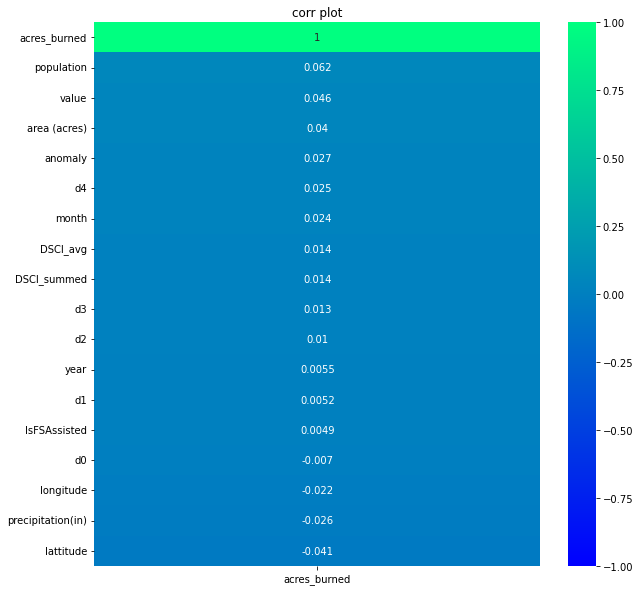

In [16]:
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

None of the variables have a strong positive or negative correlation with acres burned. This could lead to issues with the model.

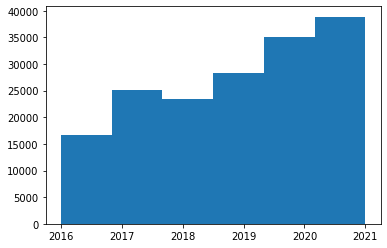

In [17]:
plt.hist(df2['year'], bins = 6);

fires are increasing over time. 

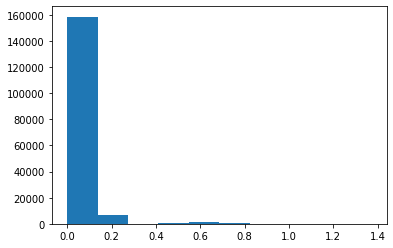

In [18]:
plt.hist(df2['precipitation(in)']);

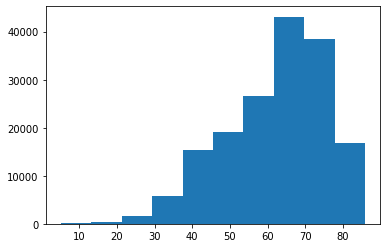

In [19]:
plt.hist(df2['value']);

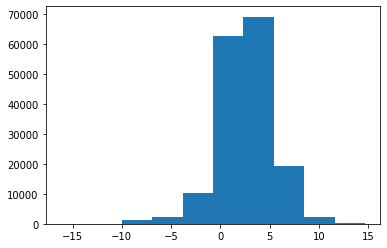

In [20]:
plt.hist(df2['anomaly']);

anomaly is the difference between temperature and historic temperature.

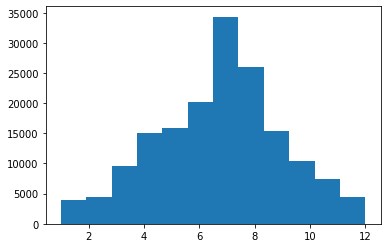

In [21]:
plt.hist(df2['month'], bins = 12);

Most fires take place in summer specifically july.

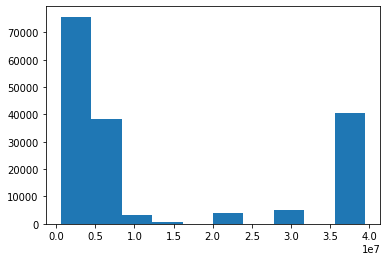

In [22]:
plt.hist(df2['population']);

In [23]:
df['state'].value_counts()

CA    47626
AZ    15803
MT    14908
OR    14191
WA    10958
UT     9676
ID     9472
CO     8304
NM     7908
ND     7809
WY     7792
TX     7033
MN     6614
OK     6508
SD     5618
NV     4937
FL     4793
AK     3999
ME     3031
MS     2053
AR     1562
MI     1480
MO     1155
AL     1106
KY      932
SC      890
NC      847
LA      712
TN      633
IL      595
VA      559
KS      552
OH      499
NE      498
GA      476
WI      403
WV      277
PA      270
IN      267
IA      267
NY      185
MA      163
NH      106
MD       89
NJ       87
VT       78
HI       38
DC       22
CT        4
DE        2
Name: state, dtype: int64

More fires take place in california then any other state. 

In [24]:
bins = [0, 0.2501, 9.901, 99.901, 299.01, 999.01, 4999.01, 9999.01, 49999.01, 99999.01]
group_names = ['A','B','C','D','E','F','G','H','I','J']
#setting up the fire classes based on definitions by National Wildfire Coordination Group 

In [25]:
d = dict(enumerate(group_names, 1))

df2['class'] = np.vectorize(d.get)(np.digitize(df2['acres_burned'], bins))

C:\Users\dmarm\AppData\Local\Temp\ipykernel_26232\1920520338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
df2.head()

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,incident_name,IsFSAssisted,origin_county,state,year,...,population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in),class
34889,2016-IDBOD-000058,-116.330913,43.406206,0.1,Human,SOUTH CLOVER,1.0,Ada,ID,2016,...,1684036.0,8.043333,0.000000,0.000000,0.0,0.0,8.043333,24.13,0.040772,A
34890,2016-MNRLA-000184,-94.916910,48.017407,0.1,Undetermined,RL 130,0.0,Beltrami,MN,2016,...,5525360.0,9.663333,1.026667,0.000000,0.0,0.0,11.716667,35.15,0.040886,A
34891,2016-MNRLA-000185,-95.015306,47.875908,0.1,Undetermined,RL 131,0.0,Beltrami,MN,2016,...,5525360.0,9.663333,1.026667,0.000000,0.0,0.0,11.716667,35.15,0.040886,A
34892,2016-AZA5S-002056,-112.761608,34.201307,0.5,Undetermined,KRISTEE,0.0,Yavapai,AZ,2016,...,6944767.0,32.776667,65.580000,1.170000,0.0,0.0,167.446667,502.34,0.031042,B
34893,2016-AZNAA-000033,-108.537233,36.744172,0.5,Human,HOGBACK 1,1.0,San Juan,NM,2016,...,2092555.0,53.023333,43.686667,0.086667,0.0,0.0,140.656667,421.97,0.235141,B


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167273 entries, 34889 to 206138
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unique_fire_identifier  167273 non-null  object 
 1   lattitude               167273 non-null  float64
 2   longitude               167273 non-null  float64
 3   acres_burned            167273 non-null  float64
 4   fire_cause              167273 non-null  object 
 5   incident_name           167273 non-null  object 
 6   IsFSAssisted            167273 non-null  float64
 7   origin_county           167273 non-null  object 
 8   state                   167273 non-null  object 
 9   year                    167273 non-null  int64  
 10  month                   167273 non-null  int64  
 11  value                   167273 non-null  float64
 12  anomaly                 167273 non-null  float64
 13  area (acres)            167273 non-null  float64
 14  population      

In [28]:
df2['class'].value_counts()

A    55304
B    38521
C    22983
F    18769
E    17182
D    13396
H      499
G      445
I       91
J       83
Name: class, dtype: int64

We are dealing with unbalanced classes. We will try oversampling in the modeling part.

In [17]:
baseline = 55304/167273
baseline

0.3306212000741303

Class A is the biggest class so the total percentage of class A will be our model baseline. It is around 33%.

<Figure size 3600x3600 with 0 Axes>

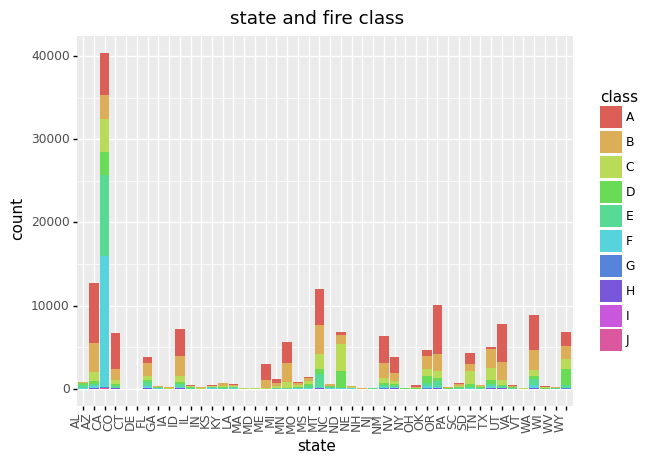

<ggplot: (127513802846)>

In [27]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'state', fill = 'class'), data = df2) + geom_bar() + theme(axis_text_x  = element_text(angle = 90, hjust = 1))+ ggtitle('state and fire class')

<Figure size 3600x3600 with 0 Axes>

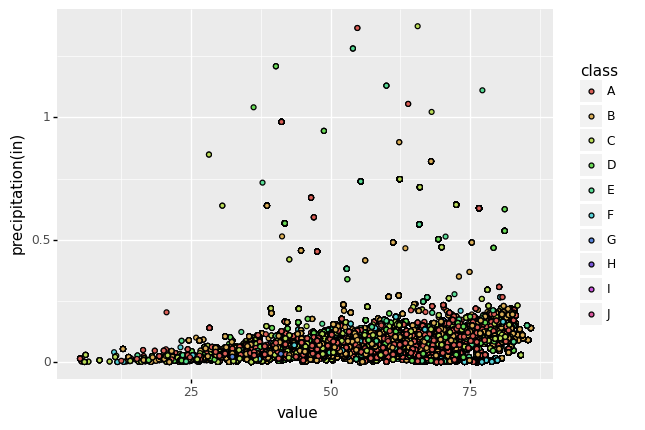

<ggplot: (79502604307)>

In [29]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'value', y= 'precipitation(in)', fill = 'class'), data = df2) + geom_point()

<Figure size 3600x3600 with 0 Axes>

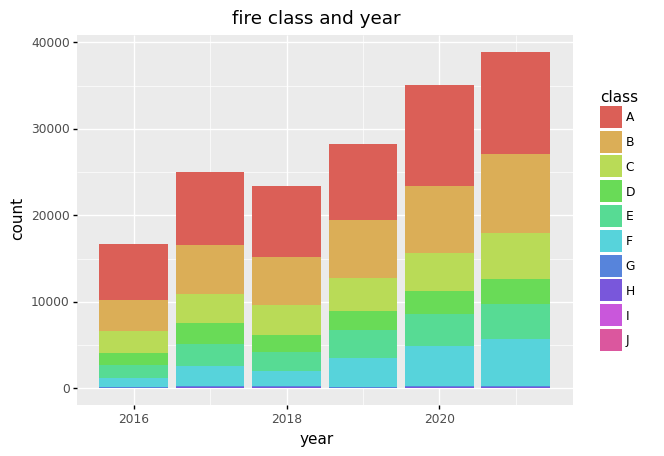

<ggplot: (127513148919)>

In [17]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'year', fill = 'class'), data = df2) + geom_bar() + ggtitle('fire class and year')

<Figure size 3600x3600 with 0 Axes>

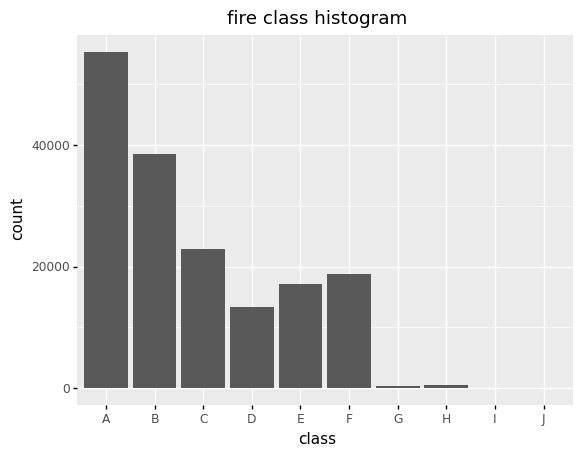

<ggplot: (127513144522)>

In [15]:
plt.figure(figsize = (50, 50));
ggplot(aes(x = 'class'), data = df2) + geom_bar()+ ggtitle('fire class histogram')

<Figure size 3600x3600 with 0 Axes>

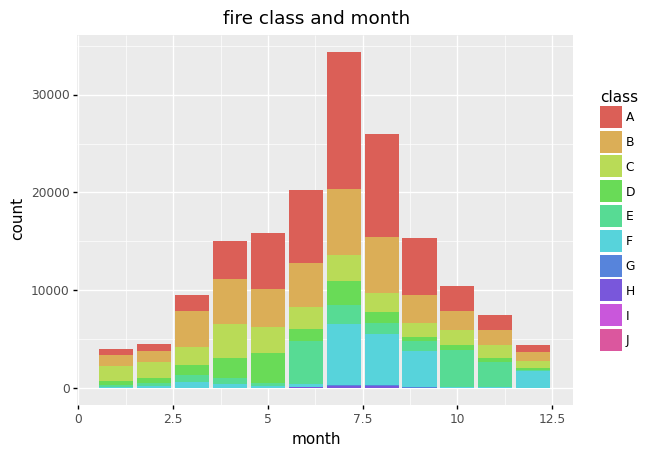

<ggplot: (127513580954)>

In [19]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'month', fill = 'class'), data = df2) + geom_bar() + ggtitle('fire class and month')

In [31]:
df2['origin_county'].value_counts().head(15)

Los Angeles       13448
Riverside          3492
Coconino           2921
Beltrami           2122
Lake               1940
San Juan           1698
Benson             1661
Lincoln            1648
Humboldt           1581
San Bernardino     1536
Gila               1447
Deschutes          1347
Siskiyou           1346
Big Horn           1332
Grant              1311
Name: origin_county, dtype: int64

Los Angeles county has 4 times as many fires as any other county.

In [30]:
df2['fire_cause'].value_counts()

Human           65559
Unknown         49541
Natural         30122
Undetermined    22051
Name: fire_cause, dtype: int64

In [31]:
ca_fire = df2[df2["state"] == 'CA']

In [32]:
corr2 = ca_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

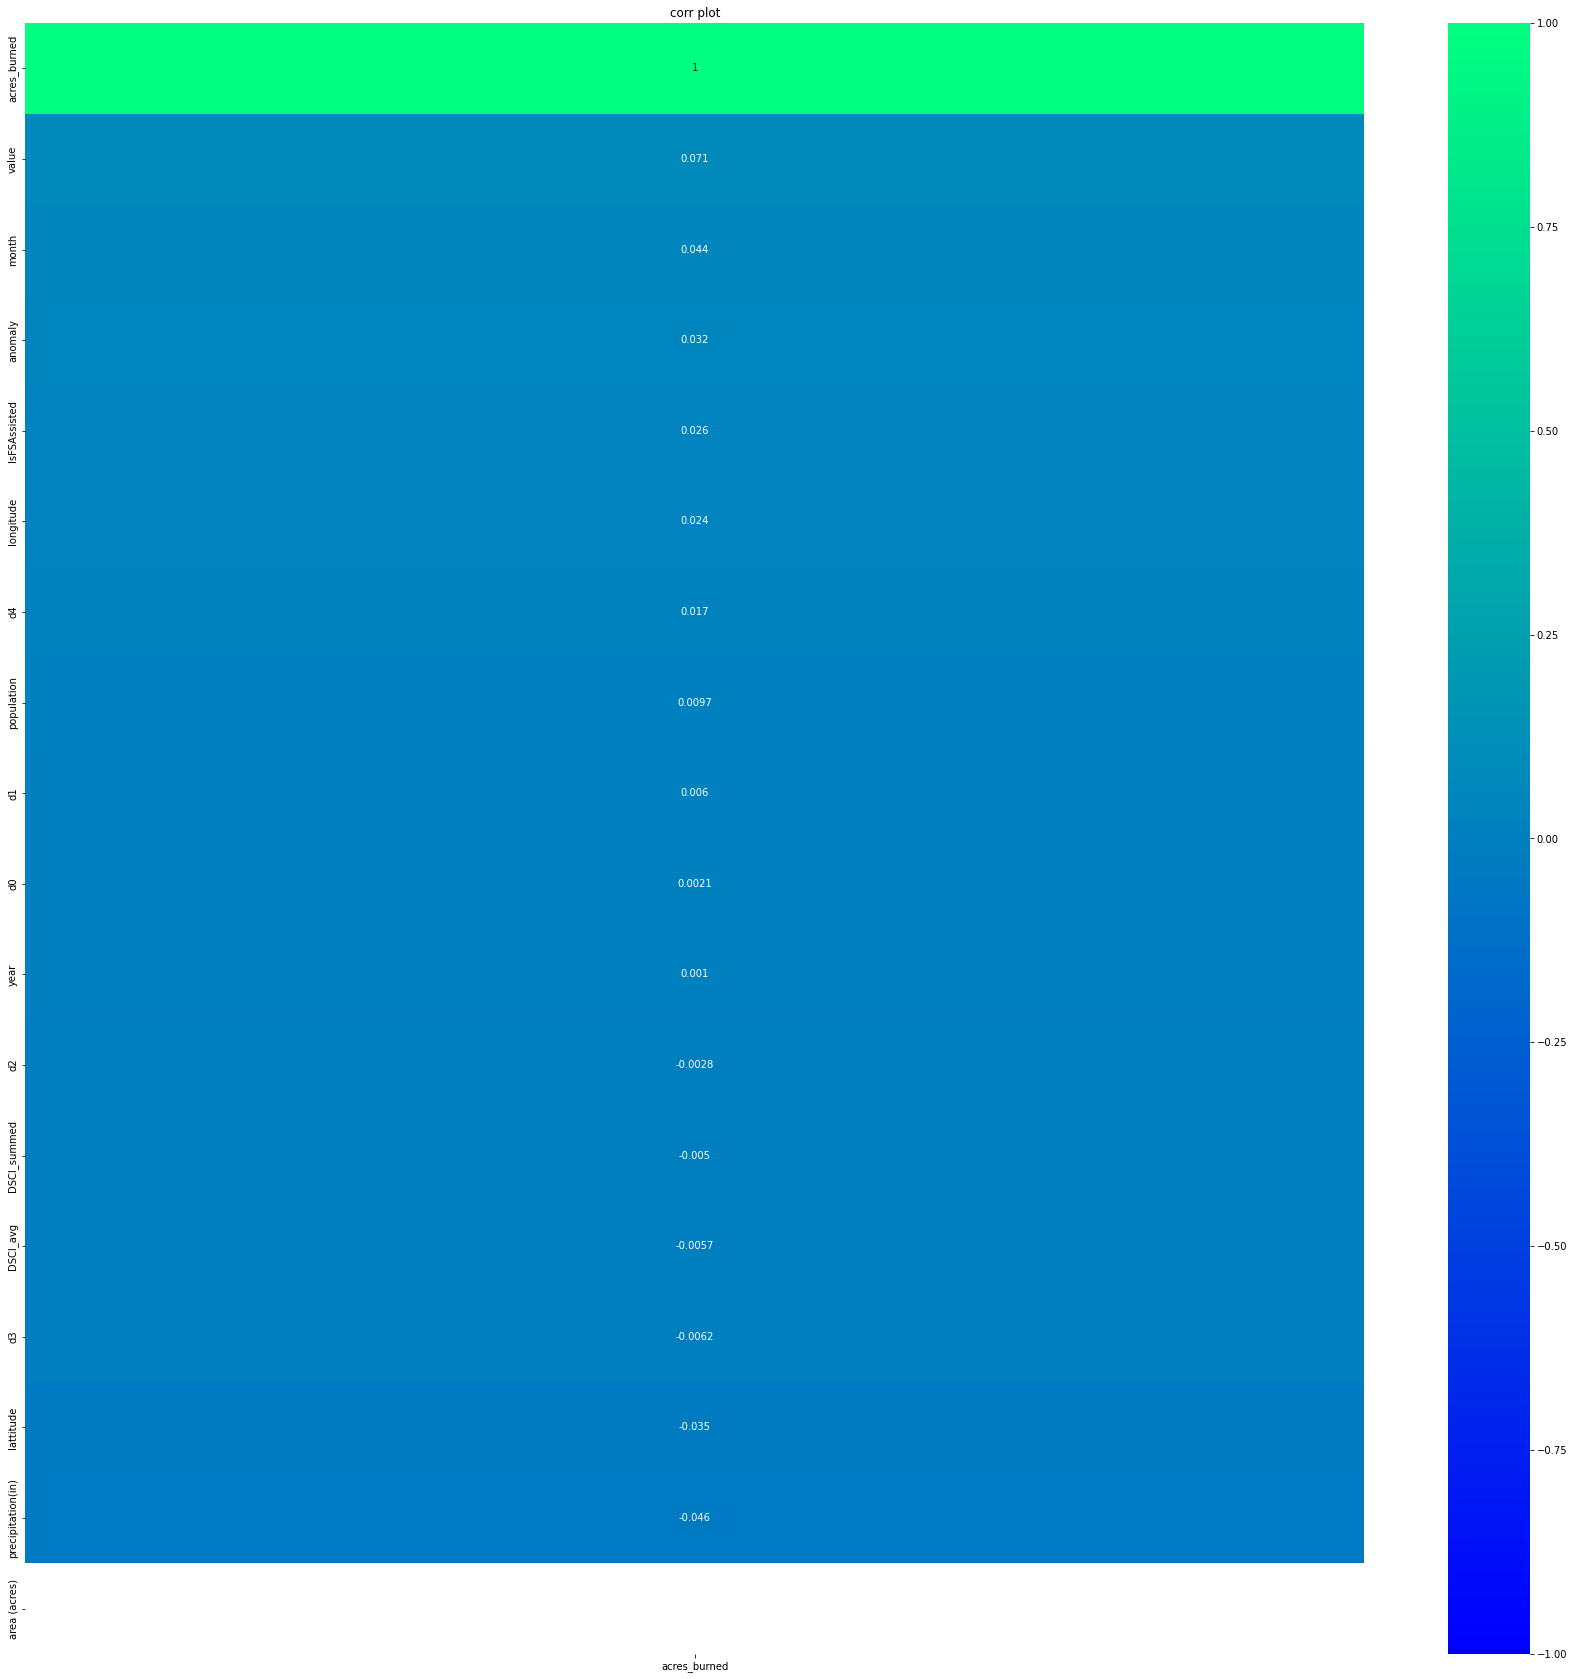

In [33]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr2, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

I wanted to know if there would be stronger correlations if I focused on a narrower area but there were not.

In [35]:
la_county_fire = ca_fire[ca_fire["origin_county"] == 'Los Angeles']

In [36]:
corr3 = la_county_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

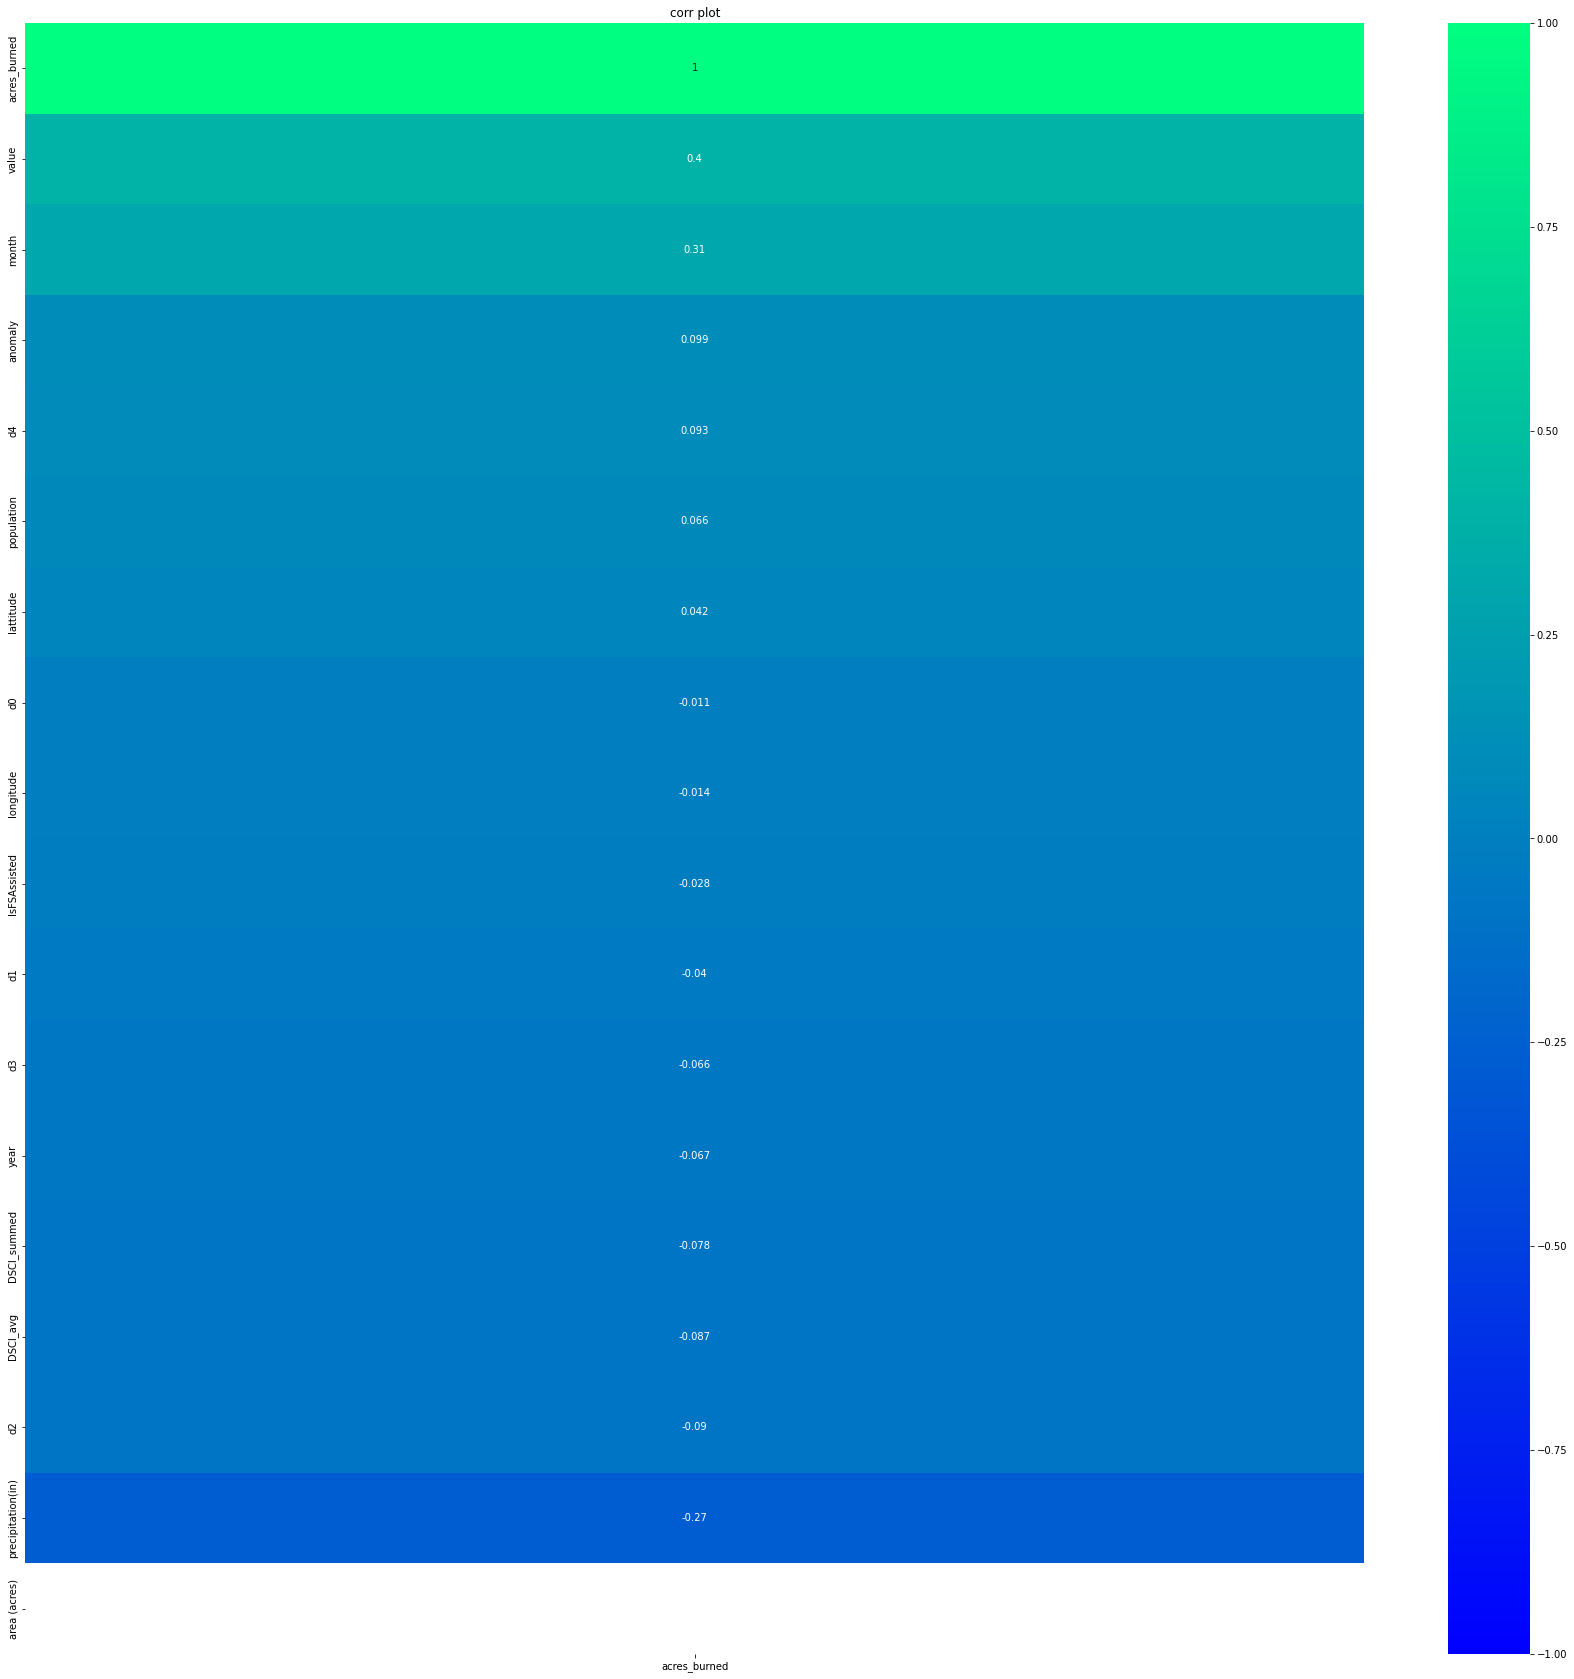

In [37]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr3, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

Even at this level the correlations are weak.

In [16]:
df2.to_csv('data.csv')

The data is saved for the modeling phase.